In [3]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('raster_cuda_final.csv')

In [5]:
df.iloc[0]

Cores                   16.000000
Render_composite         0.020070
Resolution            1084.000000
Base                   217.000000
Camera Angle             0.000000
Memory Transfer          0.053620
Init buffer              0.000238
Cull                     0.000840
Rasterize                0.001005
Write Surface            0.000302
Total Render             0.002429
pixels              331436.000000
actual pixels       215120.000000
objects             482232.000000
rank                     0.000000
frame                    1.000000
 ssp                     1.000000
Name: 0, dtype: float64

In [6]:
df.describe()

,Cores,Render_composite,Resolution,Base,Camera Angle,Memory Transfer,Init buffer,Cull,Rasterize,Write Surface,Total Render,pixels,actual pixels,objects,rank,frame,ssp
count,95580.000000,95580.000000,95580.000000,95580.000000,95580.0,95580.000000,95580.000000,95580.000000,95580.000000,95580.000000,95580.000000,9.558000e+04,9.558000e+04,9.558000e+04,95580.000000,95580.000000,95580.000000
mean,44.666667,0.044615,1697.385405,223.871375,0.0,0.125018,0.000356,0.000984,0.001038,0.000788,0.003206,3.696708e+05,2.405251e+05,3.798339e+05,21.833333,5.000000,1.878814
std,22.250405,0.032585,684.765809,55.553708,0.0,0.168667,0.000119,0.000243,0.000715,0.000533,0.001235,5.800530e+05,3.631464e+05,2.425154e+05,18.199025,2.582002,4.407975
min,1.000000,0.005104,528.000000,129.000000,0.0,0.008367,0.000183,0.000549,0.000254,0.000090,0.001212,6.864000e+03,5.024000e+03,1.945600e+04,0.000000,1.000000,0.000000
25%,27.000000,0.017415,1103.000000,175.000000,0.0,0.038089,0.000254,0.000797,0.000596,0.000305,0.002255,8.547525e+04,5.682675e+04,2.003415e+05,6.000000,3.000000,0.000000
50%,64.000000,0.037009,1707.500000,224.000000,0.0,0.059363,0.000335,0.000970,0.000857,0.000691,0.002966,2.027640e+05,1.349190e+05,3.305770e+05,17.000000,5.000000,0.000000
75%,64.000000,0.065394,2283.000000,271.000000,0.0,0.122818,0.000445,0.001159,0.001244,0.001205,0.003969,4.179290e+05,2.752760e+05,5.275902e+05,34.000000,7.000000,2.000000
max,64.000000,0.189291,2857.000000,319.000000,0.0,1.190050,0.000997,0.002423,0.008739,0.001924,0.012624,7.774172e+06,4.785852e+06,1.220952e+06,63.000000,9.000000,92.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95580 entries, 0 to 95579
Data columns (total 17 columns):
Cores               95580 non-null int64
Render_composite    95580 non-null float64
Resolution          95580 non-null int64
Base                95580 non-null int64
Camera Angle        95580 non-null int64
Memory Transfer     95580 non-null float64
Init buffer         95580 non-null float64
Cull                95580 non-null float64
Rasterize           95580 non-null float64
Write Surface       95580 non-null float64
Total Render        95580 non-null float64
pixels              95580 non-null int64
actual pixels       95580 non-null int64
objects             95580 non-null int64
rank                95580 non-null int64
frame               95580 non-null int64
 ssp                95580 non-null int64
dtypes: float64(7), int64(10)
memory usage: 12.4 MB


In [8]:
singleCore = df[(df['Cores'] == 1)]

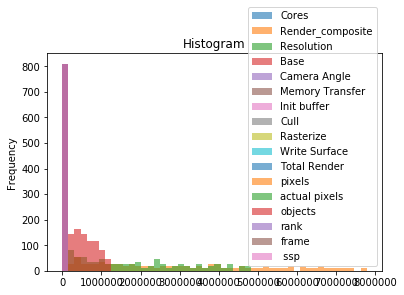

In [9]:
singleCore.plot(kind='hist',
        bins=50,
        title='Histogram',
        alpha=0.6);

#subplot arguments(numRows, numCols, index)

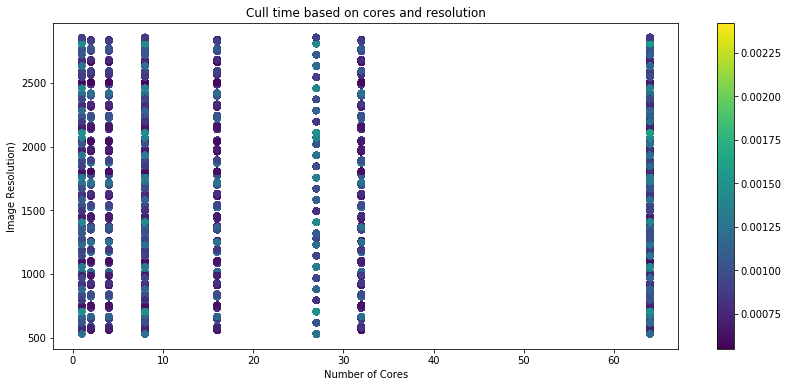

In [10]:
plt.figure(figsize = (14,6))
p1 = plt.scatter(df.Cores, df.Resolution, c=df['Cull'])
plt.xlabel('Number of Cores')
plt.ylabel('Image Resolution)')
plt.title('Cull time based on cores and resolution')
plt.colorbar(p1)
plt.draw()
plt.show()

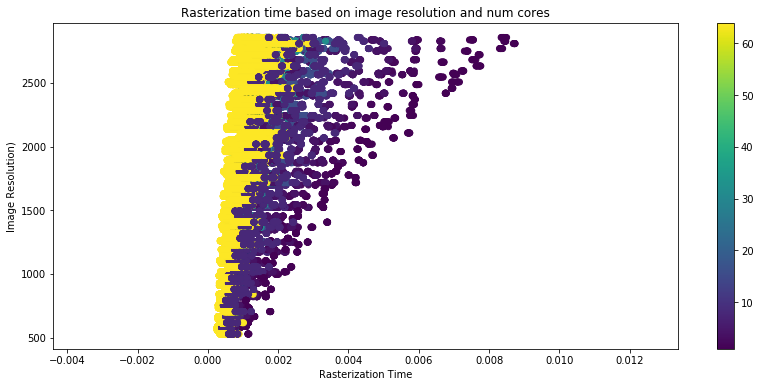

In [11]:
plt.figure(figsize = (14,6))
p1 = plt.scatter(df.Rasterize, df.Resolution, c=df['Cores'])
plt.xlabel('Rasterization Time')
plt.ylabel('Image Resolution)')
plt.title('Rasterization time based on image resolution and num cores')
plt.colorbar(p1)
plt.draw()
plt.show()

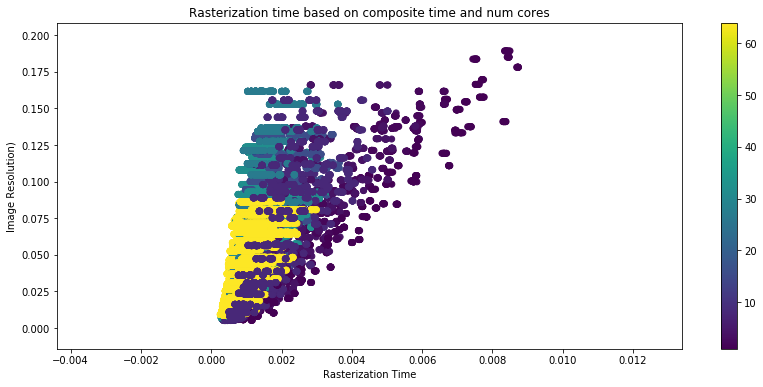

In [12]:
plt.figure(figsize = (14,6))
p1 = plt.scatter(df.Rasterize, df.Render_composite, c=df['Cores'])
plt.xlabel('Rasterization Time')
plt.ylabel('Image Resolution)')
plt.title('Rasterization time based on composite time and num cores')
plt.colorbar(p1)
plt.draw()
plt.show()

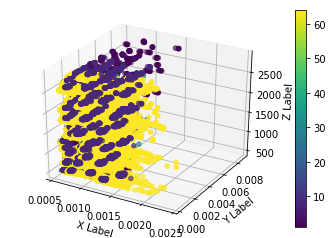

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df.Cull, df.Rasterize, df.Resolution, c=df['Cores'])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.colorbar(p)
plt.show()

In [14]:
from sklearn.cluster import KMeans

In [15]:
X = df[['Cores', 'Resolution',  'Cull',  'Render_composite']]
km = KMeans(n_clusters=3, init='random')
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
km.__dict__

{'n_clusters': 3,
 'init': 'random',
 'max_iter': 300,
 'tol': 0.0001,
 'precompute_distances': 'auto',
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'n_jobs': 1,
 'algorithm': 'auto',
 'cluster_centers_': array([[4.46666667e+01, 2.48670678e+03, 9.77713676e-04, 8.14009535e-02],
        [4.46666667e+01, 1.69740678e+03, 9.78629785e-04, 3.82083752e-02],
        [4.46666667e+01, 9.08042655e+02, 9.97021889e-04, 1.42366477e-02]]),
 'labels_': array([2, 2, 2, ..., 2, 2, 2], dtype=int32),
 'inertia_': 5164281085.57127,
 'n_iter_': 4}

In [17]:
centers = km.cluster_centers_
centers

array([[4.46666667e+01, 2.48670678e+03, 9.77713676e-04, 8.14009535e-02],
       [4.46666667e+01, 1.69740678e+03, 9.78629785e-04, 3.82083752e-02],
       [4.46666667e+01, 9.08042655e+02, 9.97021889e-04, 1.42366477e-02]])

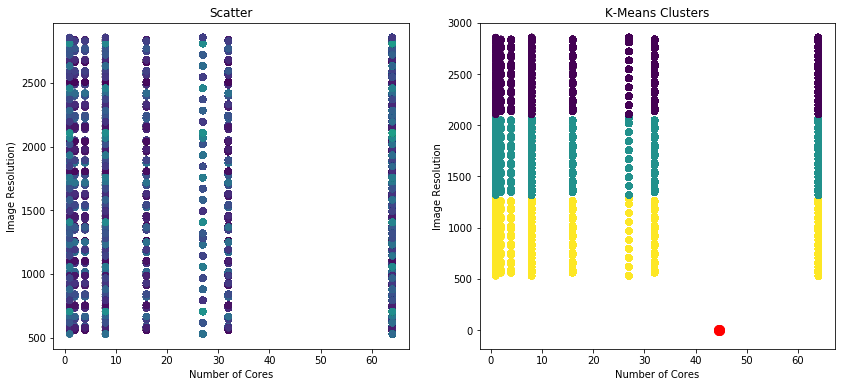

In [18]:
plt.figure(figsize = (14,6))
plt.subplot(121)
plt.scatter(df.Cores, df.Resolution, c=df['Cull'])
plt.xlabel('Number of Cores')
plt.ylabel('Image Resolution)')
plt.title('Scatter')

plt.subplot(122)
plt.scatter(df.Cores, df.Resolution, c=km.labels_)
plt.scatter(centers[:,0], centers[:,2], marker='o', c='r', s=100)
plt.xlabel('Number of Cores')
plt.ylabel('Image Resolution')
plt.title('K-Means Clusters')
plt.draw()
plt.show()

In [19]:
#look at this for models of performance data
# Create Features and Labels
#X = df[['Male', 'Family',
#        'Pclass2_one', 'Pclass2_two', 'Pclass2_three',
#        'Embarked_C', 'Embarked_Q', 'Embarked_S',
#        'Age2', 'Fare3_Fare11to50', 'Fare3_Fare51+', 'Fare3_Fare<=10']]
#y = df['Survived']
X = df[['Resolution', 'Cores', 'Cull', 'Render_composite', 'Rasterize']]
y = df['Total Render']

In [20]:
lab_enc = preprocessing.LabelEncoder()
encodedY = lab_enc.fit_transform(y)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, encodedY, test_size=.2, random_state=0)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print('Train Accuracy: {:0.3}'.format(accuracy_score(y_train, pred_train)))
print('Test Accuracy: {:0.3}'.format(accuracy_score(y_test, pred_test)))